# Develop a program to create histograms for all numerical features and analyze the distribution of each feature. Generate box plots for all numerical features and identify any outliers. Use California Housing dataset.

In [ ]:
%pip install pandas matplotlib seaborn numpy

## Import necessary libraries and load the dataset

- Convert it to a pandas DataFrame and add the target variable (PRICE)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
# Load California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

In [4]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Get basic information about the dataset

- The number of rows and columns
- Data types of each feature
- Basic statistical measures like mean, std, min, max for all numerical features

In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Basic Statistics:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547

In [10]:
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"\n{column}:")
    print(f"Minimum: {min_val:,.2f}")
    print(f"Maximum: {max_val:,.2f}")


MedInc:
Minimum: 0.50
Maximum: 15.00

HouseAge:
Minimum: 1.00
Maximum: 52.00

AveRooms:
Minimum: 0.85
Maximum: 141.91

AveBedrms:
Minimum: 0.33
Maximum: 34.07

Population:
Minimum: 3.00
Maximum: 35,682.00

AveOccup:
Minimum: 0.69
Maximum: 1,243.33

Latitude:
Minimum: 32.54
Maximum: 41.95

Longitude:
Minimum: -124.35
Maximum: -114.31

PRICE:
Minimum: 0.15
Maximum: 5.00


Some insights about these ranges:
- Median income ranges from `$5K` to `$150K` per month
- Houses are between 1 and 52 years old
- Average rooms per household varies greatly (0.85 to 141.91)
- Population per block group ranges from very small (3) to large communities (35,682)

## Create histograms for all numerical features

- Create a 3x3 grid of subplots
- For each feature, plots a histogram with a kernel density estimate (KDE) line
- The KDE line helps visualize the probability density of the data
- tight_layout() ensures proper spacing between subplots

In [ ]:
print(plt.style.available) #default for matplotlib style 

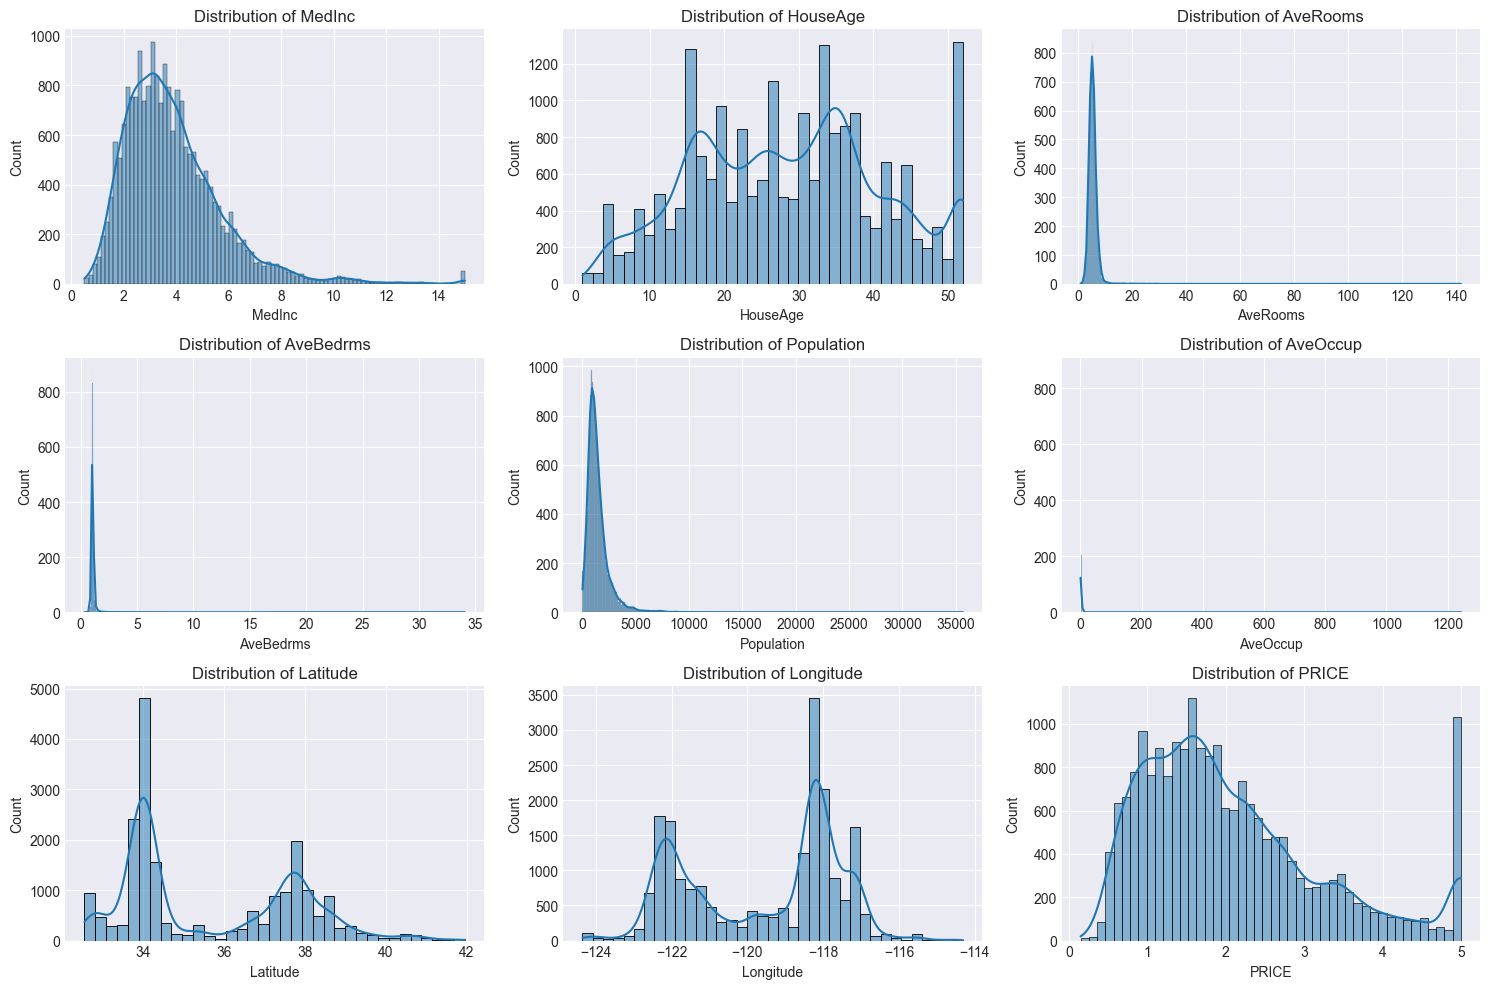

In [8]:
# Set up the figure size and style
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(15, 10))

# Create histograms for each feature
for idx, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, idx)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Create box plots for all numerical features

A box plot (also called a box-and-whisker plot) is a graphical representation of a dataset's distribution. It helps visualize the spread, central tendency, and potential outliers in numerical data.

A box plot consists of:
- Median (Q2) – The middle value of the dataset (represented by a line inside the box).
- First Quartile (Q1, 25th percentile) – The value below which 25% of the data falls.
- Third Quartile (Q3, 75th percentile) – The value below which 75% of the data falls.
- Interquartile Range (IQR) – The range between Q1 and Q3 (IQR = Q3 - Q1).
- Whiskers – These extend to the smallest and largest values within 1.5 times the IQR from Q1 and Q3.
- Outliers – Any values that fall outside the whiskers (beyond 1.5 * IQR) are considered potential outliers.

Feature: MedInc, Outliers: 681
Feature: HouseAge, Outliers: 0
Feature: AveRooms, Outliers: 511
Feature: AveBedrms, Outliers: 1424
Feature: Population, Outliers: 1196
Feature: AveOccup, Outliers: 711
Feature: Latitude, Outliers: 0
Feature: Longitude, Outliers: 0
Feature: PRICE, Outliers: 1071


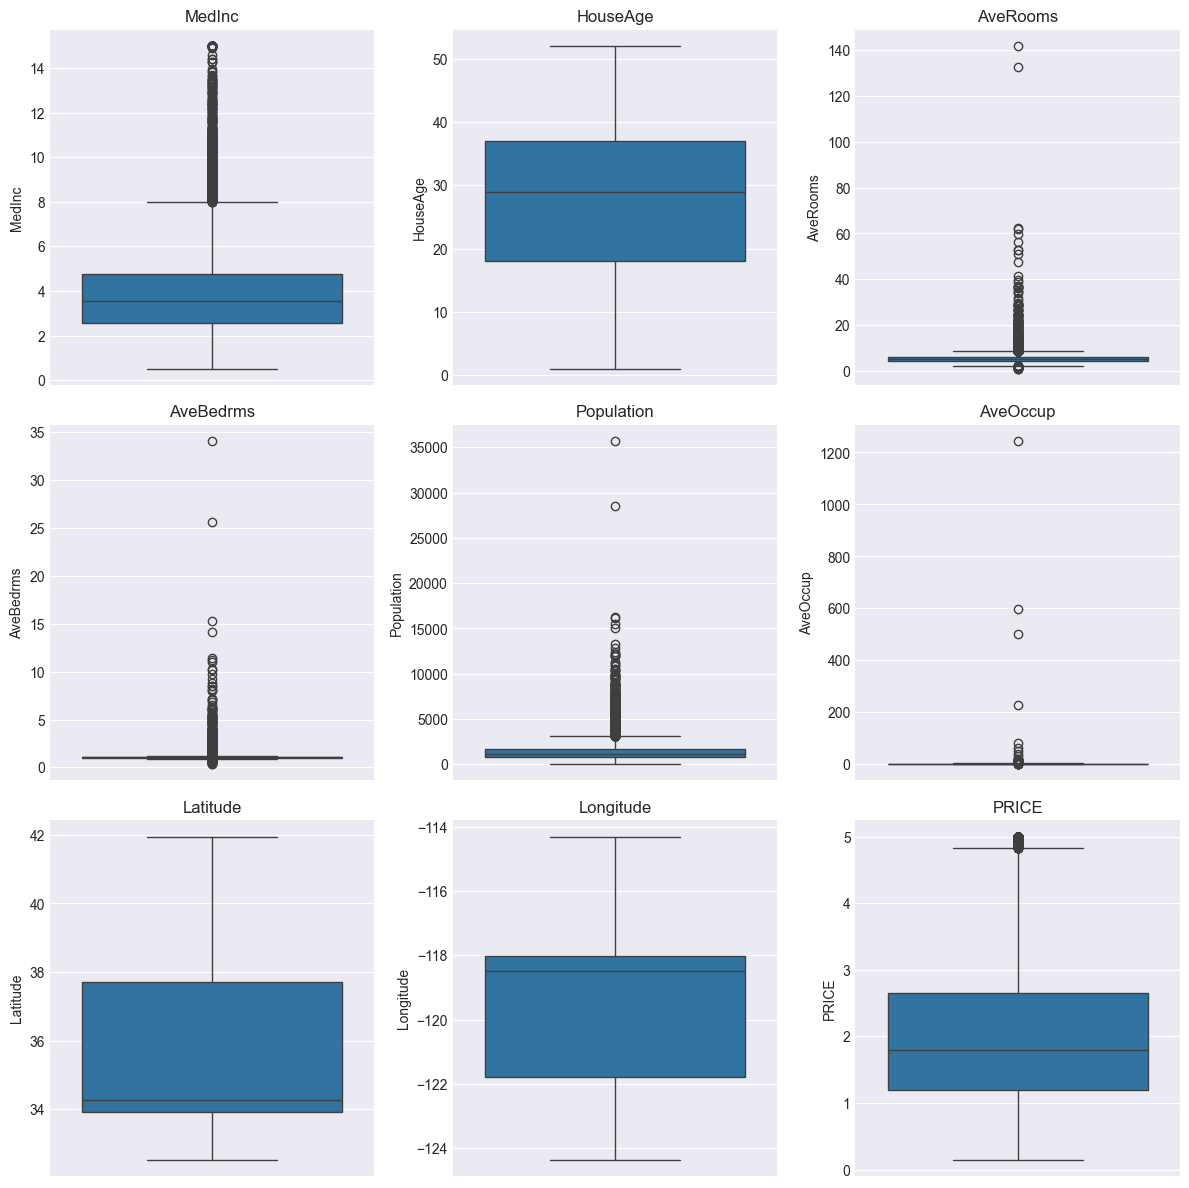

In [9]:
# Function to identify outliers using the Interquartile Range (IQR) method
def find_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    return column[(column < lower_bound) | (column > upper_bound)]  # Return values outside bounds

# Create box plots for all numerical features
plt.figure(figsize=(12, 12))  # Set figure size
for i, col in enumerate(df.columns):  # Iterate over each feature column
    plt.subplot(3, 3, i + 1)  # Create subplots in a grid layout
    sns.boxplot(y=df[col])  # Generate box plot for the column
    plt.title(col)  # Set title as feature name
    
    # Identify and count outliers in the column
    outliers = find_outliers(df[col])
    print(f"Feature: {col}, Outliers: {len(outliers)}")  # Print count of outliers

plt.tight_layout()  # Adjust subplot layout for better readability
plt.show()  # Display the box plots

## Key Findings in California Housing Dataset:

### From the Histograms:

1. MedInc (Median Income):
	- Right-skewed distribution (tail extends to the right)
	- Most households have lower to medium incomes
	- Few high-income outliers

4. HouseAge:
	- Multi-modal distribution (multiple peaks)
	- Shows distinct age groups of housing developments
	- Most houses cluster around certain age brackets

5. AveRooms & AveBedrms:
	- Heavily right-skewed
	- Most homes have a standard number of rooms
	- Some extreme outliers with very high numbers

6. Population:
	- Extremely right-skewed
	- Most areas have moderate population
	- Some areas with very high population counts

7. AveOccup (Average Occupancy):
	- Right-skewed
	- Most homes have standard occupancy
	- Some extreme outliers with very high occupancy

### From the Box Plots & Outlier Analysis:

1. Number of Outliers per Feature:
	- AveBedrms: 1,424 outliers (highest)
	- Population: 1,196 outliers
	- AveOccup: 711 outliers
	- MedInc: 681 outliers
	- AveRooms: 511 outliers
	- HouseAge: 0 outliers
	- Latitude: 0 outliers
	- Longitude: 0 outliers

2. Key Observations:
	- Geographic features (Latitude, Longitude) show no outliers, suggesting all locations are within expected California boundaries
	- HouseAge has no outliers, indicating consistent age distribution
	- Bedroom and population metrics have the most outliers, suggesting some unusual housing arrangements
	- Housing-related metrics (rooms, bedrooms, occupancy) show significant numbers of outliers, indicating some non-standard housing situations